<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df = pd.read_csv('Cardetails.csv')

In [6]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
df.drop(columns=['torque'], inplace=True)

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [9]:
df.shape

(8128, 12)

# Preprocessing

In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(7907, 12)

In [13]:
#Duplicate Check
df.duplicated().sum()

1189

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(6718, 12)

In [16]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


# Data Analysis

In [18]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

# EDA

In [19]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

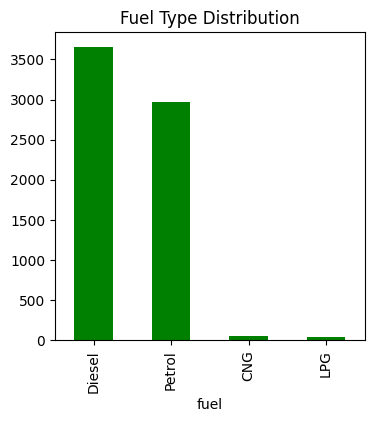

In [20]:
plt.figure(figsize=(4,4))
df['fuel'].value_counts().plot(kind='bar',color ='green')
plt.title('Fuel Type Distribution')
plt.show()

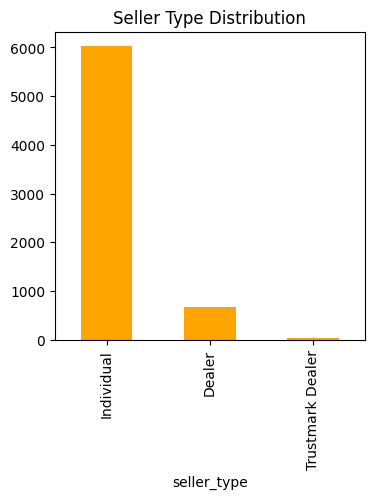

In [21]:
plt.figure(figsize=(4,4))
df['seller_type'].value_counts().plot(kind='bar',color ='orange')
plt.title('Seller Type Distribution')
plt.show()

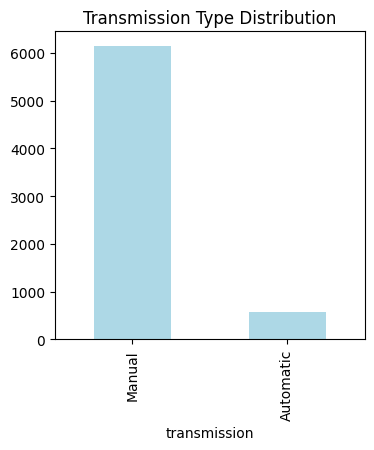

In [22]:
plt.figure(figsize=(4,4))
df['transmission'].value_counts().plot(kind='bar',color ='lightblue')
plt.title('Transmission Type Distribution')
plt.show()

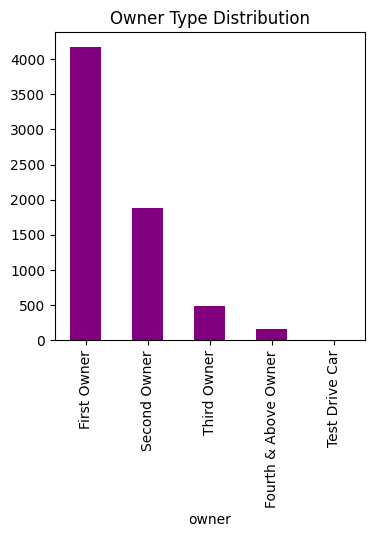

In [23]:
plt.figure(figsize=(4,4))
df['owner'].value_counts().plot(kind='bar',color ='purple')
plt.title('Owner Type Distribution')
plt.show()

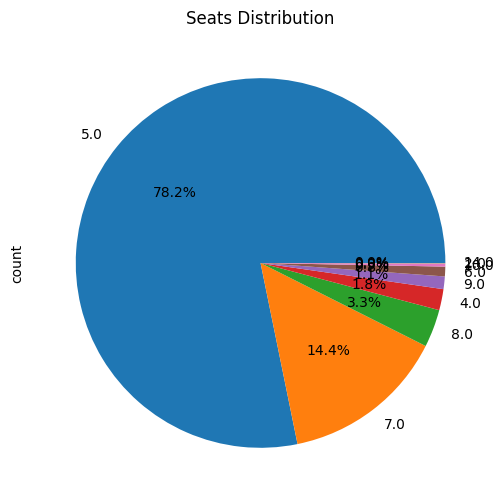

In [24]:
df['seats'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Seats Distribution')
plt.show()

In [25]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [26]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [27]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [28]:
df['name'] = df['name'].apply(get_brand_name)

In [29]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [30]:
df['mileage'] = df['mileage'].apply(clean_data)

In [31]:
df['max_power'] = df['max_power'].apply(clean_data)

In [32]:
df['engine'] = df['engine'].apply(clean_data)

In [33]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

# Encoding the Categorical data

In [34]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [35]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [36]:
df['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [37]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [38]:
df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [40]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [41]:
df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [43]:
df.reset_index(inplace=True)

In [44]:
df

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [45]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [46]:
df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [47]:
df.drop(columns=['index'], inplace=True)

In [48]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [49]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [50]:
# Splitting the dataset in features and label
X = df.drop([ 'selling_price'], axis = 1)
y = df['selling_price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [52]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [53]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6713    260000
6714    475000
6715    320000
6716    135000
6717    382000
Name: selling_price, Length: 6718, dtype: int64

In [54]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((4702, 11), (4702,), (2016, 11), (2016,))

# model Creation

# RandomForestRegressor

In [55]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
predict = model.predict(X_test)

In [57]:
r2_1 = r2_score(y_test, predict)
print("R-squared:", r2_1)
rounded_r2 = round(r2_1, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9143484104918104
R-squared (rounded): 91.0


# LinearRegression

In [58]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [59]:
predict_1 = model_1.predict(X_test)

In [60]:
r2_2 = r2_score(y_test, predict_1)
print("R-squared:", r2_2)
rounded_r2 = round(r2_2, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.6426080403323817
R-squared (rounded): 64.0


# DecisionTreeRegressor

In [61]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
predict_2 = model_2.predict(X_test)

In [63]:
r2_3 = r2_score(y_test, predict_2)
print("R-squared:", r2_3)
rounded_r2 = round(r2_3, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.826675001832436
R-squared (rounded): 83.0


# GradientBoostingRegressor

In [64]:
model_3 = GradientBoostingRegressor()
model_3.fit(X_train, y_train)

GradientBoostingRegressor()

In [65]:
predict_3 = model_3.predict(X_test)

In [66]:
r2_4 = r2_score(y_test, predict_3)
print("R-squared:", r2_4)
rounded_r2 = round(r2_4, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9056280997570441
R-squared (rounded): 91.0


# XGBRegressor

In [67]:
model_4 = XGBRegressor()
model_4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
predict_4 = model_4.predict(X_test)

In [69]:
r2_5 = r2_score(y_test, predict_4)
print("R-squared:", r2_5)
rounded_r2 = round(r2_5, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9119929392750462
R-squared (rounded): 91.0


# Ridge

In [70]:
model_5 = Ridge()
model_5.fit(X_train, y_train)

Ridge()

In [71]:
predict_5 = model_5.predict(X_test)

In [72]:
r2_6 = r2_score(y_test, predict_5)
print("R-squared:", r2_6)
rounded_r2 = round(r2_6, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.6426484997775898
R-squared (rounded): 64.0


# Lasso

In [73]:
model_6 = Lasso()
model_6.fit(X_train, y_train)

Lasso()

In [74]:
predict_6 = model_6.predict(X_test)

In [75]:
r2_7 = r2_score(y_test, predict_6)
print("R-squared:", r2_7)
rounded_r2 = round(r2_7, 2)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.6426087801225695
R-squared (rounded): 64.0


In [76]:
Accuracy = [ r2_1, r2_2, r2_3, r2_4, r2_5,r2_6,r2_7]

Frame = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'LinearRegression', 'Decision_tree_regressor','GradientBoostingRegressor','XGBRegressor','Ridge','Lasso'],
    'Accuracy': Accuracy
})
Frame['Accuracy'] = Frame['Accuracy'].round(2)*100
Frame.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestRegressor,91.0
3,GradientBoostingRegressor,91.0
4,XGBRegressor,91.0
2,Decision_tree_regressor,83.0
1,LinearRegression,64.0
5,Ridge,64.0
6,Lasso,64.0


# LOC ROWS

In [77]:
df.loc[910:910:]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
910,8,2015,715000,70000,1,1,1,1,15.4,2179.0,120.0,7.0


# Making a Predictive System

In [78]:
input_data = (8	,2015,	70000,	1,	1,	1,	1,	15.4,	2179.0,	120.0,	7.0)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = model.predict(reshaped_input)
print(prediction)

[957406.66666667]


# Saving the trained model

In [79]:
import pickle

In [80]:
filename = 'Car_Sales.sav'
pickle.dump(model, open(filename, 'wb'))

In [81]:
# loading the saved model
loaded_model = pickle.load(open('Car_Sales.sav', 'rb'))

In [82]:
input_data = (8	,2015,	70000,	1,	1,	1,	1,	15.4,	2179.0,	120.0,	7.0)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)


[957406.66666667]


In [83]:
for column in X.columns:
  print(column)

name
year
km_driven
fuel
seller_type
transmission
owner
mileage
engine
max_power
seats


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
